In [1]:
%load_ext autoreload
%autoreload 2

import mwclient  # for downloading example Wikipedia articles
import openai  # for generating embeddings
import os  # for environment variables
import pandas as pd  # for DataFrames to store article sections and embeddings
import re  # for cutting <ref> links out of Wikipedia articles
import tiktoken  # for counting tokens
import math
from umap import UMAP
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

from dotenv import load_dotenv  # for loading environment variables from a .env file
load_dotenv()  # load environment variables from .env file

client = openai.OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

import pandas as pd
import re, os

data_path = '/Users/toffe/dev/ai/novia/lib/serach-comparison/data/search_results.csv'
df = pd.read_csv(data_path)


paper_strings = []
for index, row in df.iterrows():
    # Generate a string with the required fields
    year = int(row['year']) if 'year' in row and not math.isnan(row['year']) else 'N/A'
    #entry_string = f"""
    #    Title: {row['title']}\n
    #    Year: {year}\nAuthors: {row['authors']}\n
    #    Published in: {row['journal']}\n
    #    Abstract: {row['abstract']}\n
    #    Keywords: {row['keywords']}
    #"""
    entry_string = f"""{row['title']}\n{row['abstract']}\n"""
    paper_strings.append(entry_string)

EMBEDDING_MODEL = "text-embedding-3-small"
BATCH_SIZE = 1000  # you can submit up to 2048 embedding inputs per request

embeddings = []
for batch_start in range(0, len(paper_strings), BATCH_SIZE):
    batch_end = batch_start + BATCH_SIZE
    batch = paper_strings[batch_start:batch_end]
    response = client.embeddings.create(model=EMBEDDING_MODEL, input=batch)
    for i, be in enumerate(response.data):
        assert i == be.index  # double check embeddings are in same order as input
    batch_embeddings = [e.embedding for e in response.data]
    embeddings.extend(batch_embeddings)


df = df.assign(text=paper_strings, embedding=embeddings)

def get_clusters(data, max_clusters=10, force_n_clusters=None):
    if force_n_clusters is None:
        n_samples = data.shape[0]
        max_clusters = min(max_clusters, n_samples - 1)  # Ensure max_clusters is less than number of samples

        if max_clusters < 2:
            raise ValueError(f"Not enough data points to form multiple clusters for silhouette analysis. {max_clusters}, {n_samples}")

        silhouette_scores = []
        K_to_try = range(2, max_clusters + 1)  # Ensure we always try at least two clusters

        for k in K_to_try:
            #print("getting k means for k =", k)
            kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
            # Calculate silhouette score for each k
            if k > 1:
                #print("getting silhouette_score for k =", k)
                score = silhouette_score(data, kmeans.labels_)
                silhouette_scores.append(score)

        # Find the optimal k
        #print("getting np argmax")
        optimal_k_index = np.argmax(silhouette_scores)
        optimal_k = K_to_try[optimal_k_index]
    else:
        optimal_k = force_n_clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(data)
    labels = kmeans.labels_

    return optimal_k, labels

embeddings = np.array(df["embedding"].tolist())
n_neighbors = max(2, min(embeddings.shape[0] - 1, int(embeddings.shape[0] * 0.1), 50))


<Request('POST', 'https://api.openai.com/v1/embeddings')>


In [12]:

# ... existing code ...
sentence = "Our vision for the future of ship commissioning. We believe that future ship commissions will contain both virtual and physical elements and that a selected part of sea-trial tests can be performed entirely on simulations. What is Virtual Commissioning? Virtual commissioning is a process used in various industries, notably in manufacturing and engineering, to simulate and validate the functionality of a system or machine before it is physically built or deployed. It involves creating a digital model or simulation of the system, which can range from individual machines to entire production lines or complex industrial processes. Shift-Left Testing. Virtual commissioning should start as early as possible in the ship-building project, years earlier than current harbor and sea trials start. Early testing lowers the risk associated with using novel green technologies. Agile Project and Business Models Virtual commissioning in shipbuilding promises to streamline development by enabling comprehensive early testing in virtual environments. This shift towards virtual testing fosters innovation and collaboration across maritime technology providers and integrators, leading to more efficient and reliable vessel designs."
# Define a function to split the list into smaller batches
def split_into_batches(data, batch_size=100):
    for i in range(0, len(data), batch_size):
        print(i, i+batch_size)
        yield data[i:i + batch_size]


# Set the batch size to ensure the token limit is not exceeded
TOKEN_LIMIT = 30000

print(len(paper_strings[0]))

# Split paper_strings into batches

results = []
# Process each batch separately
i=0
while (i < len(paper_strings):
    batch = paper_strings[i: i+100]
    
    prompt = f"""
            Papers:\n{'\n'.join(batch)}

            Sentence: {sentence}
            """
    print(len(batch), len(prompt))


    response = client.chat.completions.create(
        model="gpt-4o-2024-08-06",
        max_tokens=30000,
        messages=[
            {"role": "system", "content": "You are a text analyser and can read the abstract text of research papers and give them a relevance score to the user provided sentence."},
            {"role": "user", "content": prompt}
        ],
        response_format={
            "type": "json_schema",
            "json_schema": {
                "name": "relevance",
                "strict": True,
                "schema": {
                    "type": "object",
                    "properties": {
                        "relevance_scores": {
                            "type": "list",
                            "description": "A list of relevance scores for the provided papers, in the same order.",
                        },
                    },
                    "required": ["relevance_scores"],
                    "additionalProperties": False
                }
            }
        },
        n=1,
        stop=None,
        temperature=0
    )
    results.append(response)
    print(response)

# ... existing code ...

851
100 139693
<Request('POST', 'https://api.openai.com/v1/chat/completions')>
<Request('POST', 'https://api.openai.com/v1/chat/completions')>
<Request('POST', 'https://api.openai.com/v1/chat/completions')>


RateLimitError: Error code: 429 - {'error': {'message': 'Request too large for gpt-4o in organization org-R0y18mTygjio2WW54XzoEVV6 on tokens per min (TPM): Limit 30000, Requested 35016. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

/Users/toffe/miniforge3/envs/dl_env_p12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/toffe/miniforge3/envs/dl_env_p12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


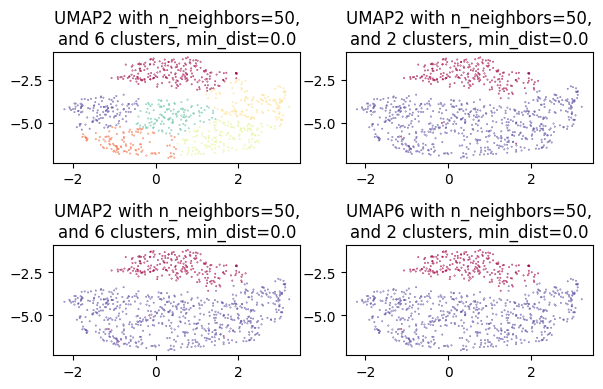

In [40]:

reducer = UMAP(n_neighbors=n_neighbors, min_dist=0.1, random_state=5, n_jobs=-1)
embeddings_umap = reducer.fit_transform(embeddings)

reducer6 = UMAP(n_neighbors=n_neighbors, min_dist=0.1, random_state=5, n_jobs=-1, n_components=6)
embeddings_umap6 = reducer6.fit_transform(embeddings)

k_e, kluster_labels_e = get_clusters(embeddings, 10)
k, kluster_labels = get_clusters(embeddings_umap, 10)
k6, kluster_labels6 = get_clusters(embeddings_umap6, 10)

fig, axes = plt.subplots(2, 2, figsize=(6, 4))

# First plot with UMAP embeddings and kluster_labels
axes[0][0].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                c=kluster_labels, s=0.1, cmap='Spectral')
axes[0][0].set_title(f"UMAP2 with n_neighbors={n_neighbors},\nand {k} clusters, min_dist={0.0}")

# Second plot with UMAP embeddings and kluster_labels_e
axes[0][1].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                c=kluster_labels_e, s=0.1, cmap='Spectral')
axes[0][1].set_title(f"UMAP2 with n_neighbors={n_neighbors},\nand {k_e} clusters, min_dist={0.0}")

axes[1][0].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                c=kluster_labels_e, s=0.1, cmap='Spectral')
axes[1][0].set_title(f"UMAP2 with n_neighbors={n_neighbors},\nand {k} clusters, min_dist={0.0}")

axes[1][1].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1],
                c=kluster_labels6, s=0.1, cmap='Spectral')
axes[1][1].set_title(f"UMAP6 with n_neighbors={n_neighbors},\nand {k6} clusters, min_dist={0.0}")


plt.tight_layout()
plt.show()

In [22]:
df['umap_x'] = embeddings_umap[:, 0]
df['umap_y'] = embeddings_umap[:, 1]
df['umap_label'] = kluster_labels


#df.to_csv('data/papers_with_umap.csv', index=False)


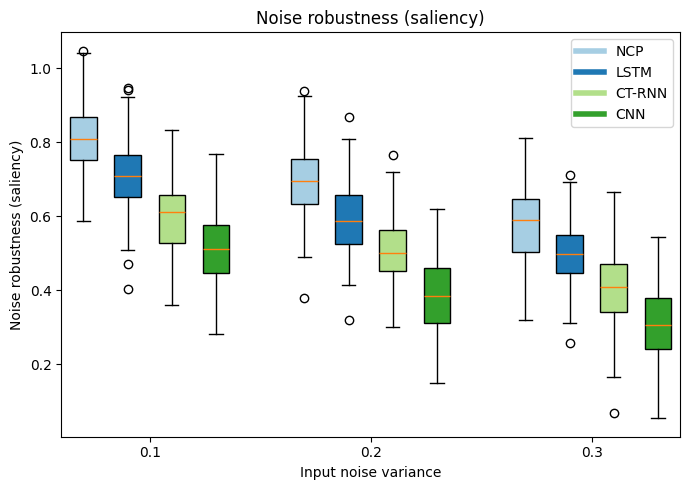

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: You can replace these with actual data if available
np.random.seed(10)
data = [np.random.normal(0.8, 0.1, 100), np.random.normal(0.7, 0.1, 100), np.random.normal(0.6, 0.1, 100), np.random.normal(0.5, 0.1, 100)]
data2 = [np.random.normal(0.7, 0.1, 100), np.random.normal(0.6, 0.1, 100), np.random.normal(0.5, 0.1, 100), np.random.normal(0.4, 0.1, 100)]
data3 = [np.random.normal(0.6, 0.1, 100), np.random.normal(0.5, 0.1, 100), np.random.normal(0.4, 0.1, 100), np.random.normal(0.3, 0.1, 100)]

# Group data
all_data = [data, data2, data3]

# Set up plot
fig, ax = plt.subplots(figsize=(7,5))

# Define positions for the boxes
positions = [1, 2, 3, 4]
positions2 = [6, 7, 8, 9]
positions3 = [11, 12, 13, 14]

# Colors for the boxes
colors = ['#A6CEE3', '#1F78B4', '#B2DF8A', '#33A02C']

# Create box plots for each group
box1 = ax.boxplot(all_data[0], positions=positions, patch_artist=True, widths=0.6)
box2 = ax.boxplot(all_data[1], positions=positions2, patch_artist=True, widths=0.6)
box3 = ax.boxplot(all_data[2], positions=positions3, patch_artist=True, widths=0.6)

# Set box colors
for box, color in zip([box1, box2, box3], [colors]*3):
    for patch, c in zip(box['boxes'], color):
        patch.set_facecolor(c)

# Labels and title
ax.set_xticks([2.5, 7.5, 12.5])
ax.set_xticklabels(['0.1', '0.2', '0.3'])
ax.set_xlabel('Input noise variance')
ax.set_ylabel('Noise robustness (saliency)')
ax.set_title('Noise robustness (saliency)')

# Legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, ['NCP', 'LSTM', 'CT-RNN', 'CNN'], loc='upper right')

plt.tight_layout()
plt.show()


# local outlier factor

- Dropdown, som man kan ..
    - Region of the world ... Från författaren -- hans affiliation

    - local outlier factor - scikit learn
    - 


--- gpt genrerar scopus sökningen.
